* Project Description:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, I am to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [72]:
#Import all the necessary libraries

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC, LinearSVC

In [2]:
#Read and study the provided dataset

df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#Explore the dataset

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
print("The dimension of the dataset:",df.shape)
print(f"\nThe column headers in the dataset: {df.columns}")

The dimension of the dataset: (891, 12)

The column headers in the dataset: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


It could be observed that the dataset contains 891 rows and 12 columns out of which one is the feature of interest (Survived)

In [8]:
#Check the description of the dataset

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


It is observed that certain features have min value of zero while 38% of the passengers survived 

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The dataset contains 3 different types of data (5 object, 2 float and 5 int)

In [10]:
#Check the null (missing) values in the dataset

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It is observed that there were 177 null values in Age, 687 in Cabin and 2 values in Embarked. These have to be worked on

In [13]:
#Further analysis of the missing data

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


* There are only 2 missing values in the Embarked feature, which can easily be filled with fillna(). 
* The Age feature has 177 missing values. 
* The Cabin feature with 77% of missing values requires further investigation, before it will be decided whether to be dropped or not.

<Axes: >

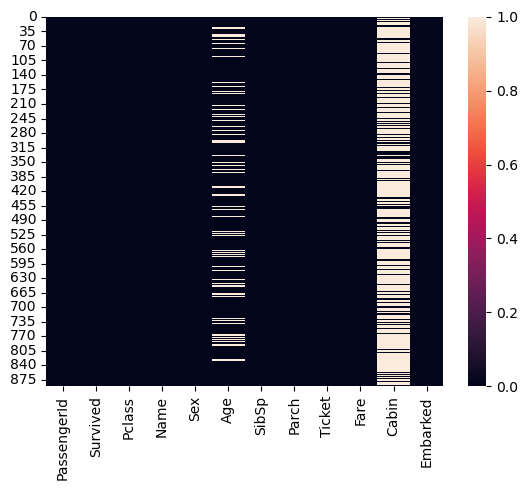

In [31]:
#Visualization using heatmap

sns.heatmap(df.isnull())

The missing values in Age, Cabin and Embarked also reflect here

In [29]:
#Brief about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
#Check the number of unique values in the dataset

df.nunique().to_frame("No. of unique values")

,No. of unique values
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,71
SibSp,7
Parch,7
Ticket,681
Fare,248


In [50]:
#this value should be checked per column as:

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64


Survived
0    549
1    342
Name: count, dtype: int64


Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64


Sex
male      577
female    314
Name: count, dtype: int64


Age
28    36
24    34
22    33
30    33
36    30
      ..
66     1
12     1
53     1
80     1
74     1
Name: count, Len

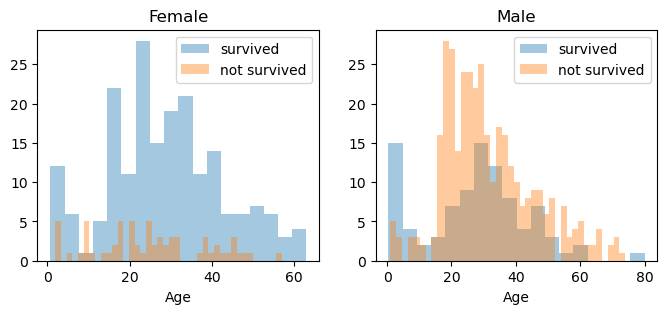

In [20]:
#Carrying out EDA

#1. Sex and Age

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(8, 3))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

* Men have a high probability of survival when they are between 18 and 30 years old, while women have survival chances between the ages 14 and 40.

<Axes: xlabel='Pclass', ylabel='Survived'>

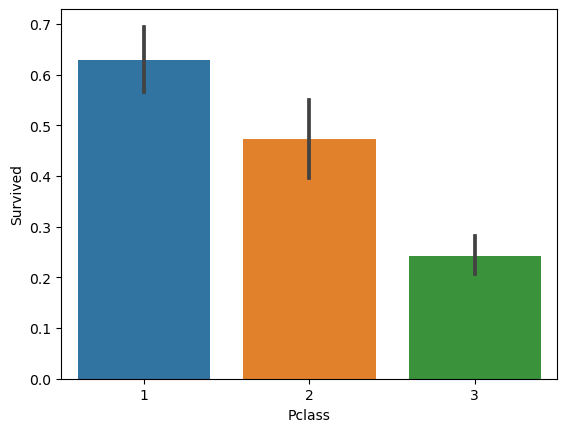

In [22]:
#2. Pclass

sns.barplot(x='Pclass', y='Survived', data=df)

Above shows that Passengers in class 1 have higher chances of survival, this is further explored below.

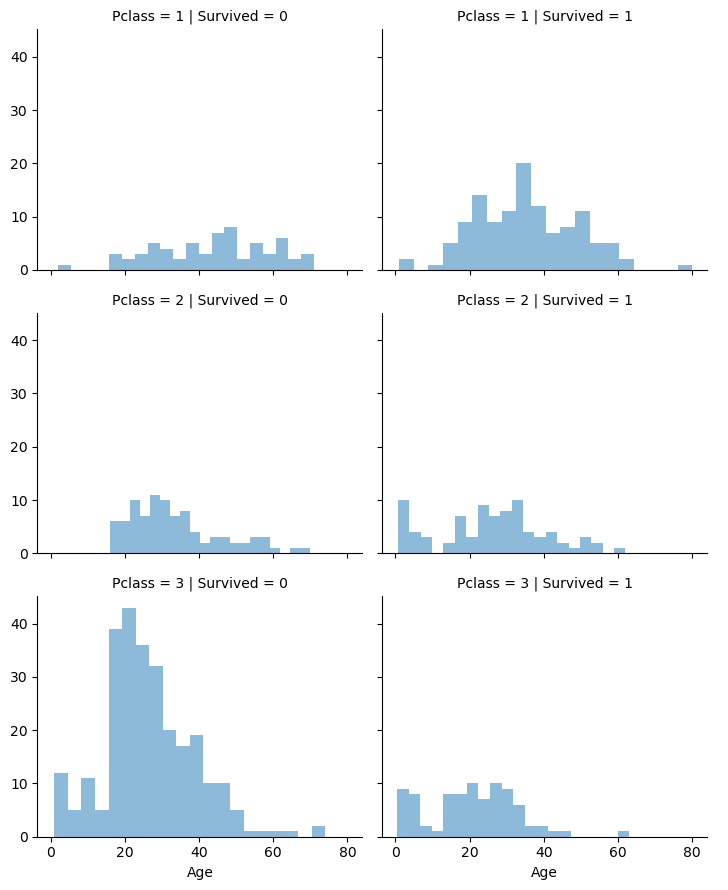

In [28]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass',  aspect=1.2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Above shows that passengers in pclass 3 have high probability of not surviving

In [56]:
#3. SibSP and Parch: to check the number of relatives a person has on the Titanic

data = [df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df['not_alone'].value_counts()

not_alone
1    537
0    354
Name: count, dtype: int64

<Axes: xlabel='relatives', ylabel='Survived'>

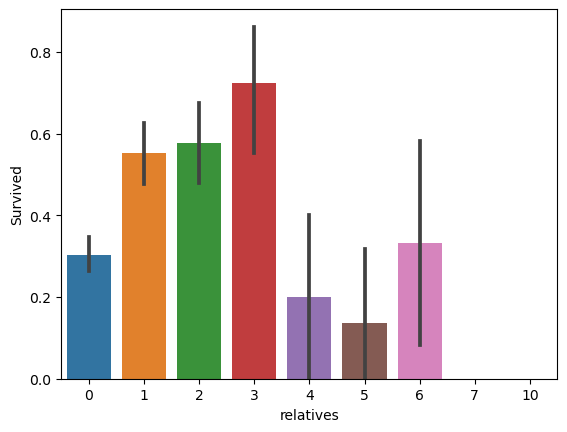

In [59]:
#Plotting

sns.barplot(x='relatives', y='Survived', data=df)

* Persons with relatives from 1 to 3 or 6 have higher probability of surviving

In [ ]:
#Dealing with the null values

#1. Cabin: exploring further shows certain numbers like 'C123' which refers to the deck and so,
#this needs to be extracted as deck and converted to numeric feature (null values to zero) 
#before the main feature is dropped

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

df = df.drop(['Cabin'], axis=1)

In [43]:
#2. Age: an array of random numbers using the mean, sd and is_null is created to fill this

for dataset in data:
    mean = df["Age"].mean()
    std = df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    age_new = dataset["Age"].copy()
    age_new[np.isnan(age_new)] = rand_age
    dataset["Age"] = age_new
    dataset["Age"] = df["Age"].astype(int)
df["Age"].isnull().sum()

0

In [45]:
#3. Embarked: fill with the common value

df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [46]:
common_value = 'S'
data = [df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [47]:
#Re-check null values

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Deck           0
dtype: int64

All the null values have now been treated accordingly 

In [48]:
#Also re-check data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Deck         891 non-null    int32  
dtypes: float64(1), int32(2), int64(5), object(4)
memory usage: 76.7+ KB


In [51]:
#Converting the Categorical features to Numerical features i.e Name, Sex, Ticket and Embarked; and Fare into int

#1. Fare
data = [df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

#2. Name: extract titles

data = [df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    dataset['Title'] = dataset['Title'].map(titles)
    
    dataset['Title'] = dataset['Title'].fillna(0)
df = df.drop(['Name'], axis=1)


#3. Sex

genders = {"male": 0, "female": 1}
data = [df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)


#4. Ticket: drop as it contains as much as 681 unique values (Out [49] above)

df = df.drop(['Ticket'], axis=1)


#5. Embarked

ports = {"S": 0, "C": 1, "Q": 2}
data = [df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [52]:
#Create categories for Age and Fare for better analysis 

#1. Age: convert to int and create group with adequate class interval for better spread

data = [df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

df['Age'].value_counts()

Age
6    167
5    159
4    159
3    131
2    112
1     95
0     68
Name: count, dtype: int64

In [54]:
#2. Fare: treat as above and covert datatype as well

data = [df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

* Model Building

In [60]:
#Create new features to ensure proper models building as:

#Age: age class

data = [df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']
    
#Fare: fare per person/ passenger

for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [62]:
#Re-check the data now

df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Age_Class,relatives,not_alone,Fare_Per_Person
0,1,0,3,0,2,1,0,0,0,8,1,6,1,0,0
1,2,1,1,1,5,1,0,3,1,3,3,5,1,0,1
2,3,1,3,1,3,0,0,0,0,8,2,9,0,1,0
3,4,1,1,1,5,1,0,3,0,3,3,5,1,0,1
4,5,0,3,0,5,0,0,1,0,8,1,15,0,1,1
5,6,0,3,0,1,0,0,1,2,8,1,3,0,1,1
6,7,0,1,0,6,0,0,3,0,5,1,6,0,1,3
7,8,0,3,0,0,3,1,2,0,8,4,0,4,0,0
8,9,1,3,1,3,0,2,1,0,8,3,9,2,0,0
9,10,1,2,1,1,1,0,2,1,8,3,2,1,0,1


In [75]:
#Test and train the dataset and then build different model to compare results

X_train = df.drop("Survived", axis=1)
Y_train = df["Survived"]
X_test  = df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 14), (891,), (891, 14))

In [76]:
#1. Logistic Regression Model

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Survived
Feature names seen at fit time, yet now missing:
- PassengerId


In [77]:
#2. Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Survived
Feature names seen at fit time, yet now missing:
- PassengerId


In [78]:
#Check outputs

outputs = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest'],
    'Score': [acc_log, 
              acc_random_forest]})

output_df = outputs.sort_values(by='Score', ascending=False)
output_df = result_df.set_index('Score')
output_df.head(9)

NameError: name 'acc_log' is not defined